# 开始

In [2]:
import time
import random
import re
import warnings
import numpy as np

import jieba
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D, Bidirectional, Activation

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
warnings.filterwarnings("ignore")

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:32_Central_Daylight_Time_2017
Cuda compilation tools, release 9.0, V9.0.176

In [3]:
import tensorflow as tf
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [6]:
import tensorflow as tf
print("Num GPUs Availiable: ",len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Availiable:  0


In [4]:
tf.config.list_physical_devices('GPU')

[]

In [2]:

contents = []
with open('./content.txt', 'r', encoding='UTF-8') as f:
    for line in f:
        if line != "\n":
            contents.append(re.split(r'[\s，、。；！]',re.sub('######', '', line).strip('"').strip()))


60158

In [35]:
contents[0]

['大多数服装品牌们刚刚度过了令人心情澎湃的销售高潮',
 '天猫的数据显示',
 '双11开场2小时',
 '阿迪达斯',
 '耐克',
 '优衣库',
 '波司登',
 '太平鸟等45个服饰品牌销售破亿',
 '多个品牌一两个小时的销售额就超过去年全天',
 '唯品会的数据也显示',
 '截至12日中午12点',
 '11.11特卖狂欢节订单量破2000万单',
 '其中服饰穿戴类商品在十一大品类中保持主力军地位',
 '火爆的数据显示',
 '中国消费者对服饰消费依然充满热情',
 '但结合国家统计局此前公布的数据——2019年上半年',
 '服装鞋帽',
 '针纺织品类同比增长3.0%',
 '增速较上年同期减少6.2个百分点',
 '换句话说',
 '上半年增速还有放缓趋势',
 '双11却爆发出强大的购买力',
 '这显示出了打折特卖的对消费者的吸引力',
 '消费者用脚投票',
 '反映在财报上',
 '是中国最大的特卖电商唯品会连续28个季度实现盈利',
 '11月13日',
 '唯品会发布未经审计的2019年第三季度财务报告',
 '财报数据显示',
 '唯品会三季度净营收196亿元',
 '同比增长10.0%',
 '除了保持连续盈利外',
 '更值得关注的是',
 '唯品会的活跃用户数也呈现稳健增长态势',
 '同比增长21％',
 '“品牌新款大衣专柜买要三四千',
 '唯品会只卖六百多',
 '”精明持家的“客栈老板”刘涛',
 '工作之余还会带着客栈“员工”一起逛唯品会看衣服',
 '她说自己这个双11的抢购标准只有一个：够简单',
 '够实惠',
 '这正是唯品会特卖升级后一直在追求的事情',
 '去年双11开始',
 '唯品会就取消了优惠券',
 '购物津贴',
 '直接给消费者呈现折扣底价',
 '今年11.11大促',
 '唯品会继续执行“无套路',
 '真便宜”的策略',
 '不再算到头疼',
 '用户只要打开唯品会',
 '就可以买到“好品牌',
 '好价格',
 '好质量',
 '好款式”',
 '在消费升维的趋势下',
 '消费者越来越具有更高的“买商”',
 '他们会结合自身的经济收入和购买力预期',
 '以更理性',
 '更科学',
 '更聪慧的方式',
 '选择质价比极佳的全球好货',
 '满足自己的消费习惯和品牌偏

In [36]:
#re.compile(r'[^\u4e00-\u9fa5]') 去除多余符号

In [6]:
mov_punc=re.compile(r'[^\u4e00-\u9fa5]')

In [7]:
Contents = []
length=0
for content in contents:
    length+=1
    Content = []
    for c in content:
        c = re.sub(mov_punc, '', c)
        if c != "":#"”"这种就被去掉了
            Content.append(c)
    Contents.append(Content)

In [8]:
Contents[0]

['大多数服装品牌们刚刚度过了令人心情澎湃的销售高潮',
 '天猫的数据显示',
 '双开场小时',
 '阿迪达斯',
 '耐克',
 '优衣库',
 '波司登',
 '太平鸟等个服饰品牌销售破亿',
 '多个品牌一两个小时的销售额就超过去年全天',
 '唯品会的数据也显示',
 '截至日中午点',
 '特卖狂欢节订单量破万单',
 '其中服饰穿戴类商品在十一大品类中保持主力军地位',
 '火爆的数据显示',
 '中国消费者对服饰消费依然充满热情',
 '但结合国家统计局此前公布的数据年上半年',
 '服装鞋帽',
 '针纺织品类同比增长',
 '增速较上年同期减少个百分点',
 '换句话说',
 '上半年增速还有放缓趋势',
 '双却爆发出强大的购买力',
 '这显示出了打折特卖的对消费者的吸引力',
 '消费者用脚投票',
 '反映在财报上',
 '是中国最大的特卖电商唯品会连续个季度实现盈利',
 '月日',
 '唯品会发布未经审计的年第三季度财务报告',
 '财报数据显示',
 '唯品会三季度净营收亿元',
 '同比增长',
 '除了保持连续盈利外',
 '更值得关注的是',
 '唯品会的活跃用户数也呈现稳健增长态势',
 '同比增长',
 '品牌新款大衣专柜买要三四千',
 '唯品会只卖六百多',
 '精明持家的客栈老板刘涛',
 '工作之余还会带着客栈员工一起逛唯品会看衣服',
 '她说自己这个双的抢购标准只有一个够简单',
 '够实惠',
 '这正是唯品会特卖升级后一直在追求的事情',
 '去年双开始',
 '唯品会就取消了优惠券',
 '购物津贴',
 '直接给消费者呈现折扣底价',
 '今年大促',
 '唯品会继续执行无套路',
 '真便宜的策略',
 '不再算到头疼',
 '用户只要打开唯品会',
 '就可以买到好品牌',
 '好价格',
 '好质量',
 '好款式',
 '在消费升维的趋势下',
 '消费者越来越具有更高的买商',
 '他们会结合自身的经济收入和购买力预期',
 '以更理性',
 '更科学',
 '更聪慧的方式',
 '选择质价比极佳的全球好货',
 '满足自己的消费习惯和品牌偏好',
 '提升自己的消费水准和消费品味',
 '尼尔森的监测数据显示',
 '很多用户从炫耀型的消费转变到了常态性的消费',
 '希望保持品位的消费'

In [43]:
length#%%几句话

60158

In [ ]:
233个类别

In [4]:
stopwords = [line.strip() for line in open('./stopwords.txt', 'r', encoding='utf-8').readlines()]

In [51]:
stopwords[:5]

['$', '0', '1', '2', '3']

In [9]:
Cons=[]
for i in range(length):
    #if labels[i] == []:
    #    continue
    #tmp = []
    #for label in labels[i]:
    #    tmp.append(labels_list[label])
    #y.append(tmp)
    
    # 分词
    #cons = jieba.lcut(titles[i], cut_all=False)
    cons=[]
    for c in Contents[i]:
        cons.extend(jieba.lcut(c, cut_all=False))
    x=[]
    for con in cons:
        if con not in stopwords:
            x.append(con)
    Cons.append(x)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\chenn\AppData\Local\Temp\jieba.cache
Loading model cost 0.927 seconds.
Prefix dict has been built successfully.


In [10]:
Cons[0]

['大多数',
 '服装品牌',
 '刚刚',
 '度过',
 '令人',
 '心情',
 '澎湃',
 '销售',
 '高潮',
 '天猫',
 '数据',
 '显示',
 '双',
 '开场',
 '小时',
 '阿迪达斯',
 '耐克',
 '优衣库',
 '波司登',
 '太平',
 '鸟',
 '服饰品牌',
 '销售',
 '破',
 '亿',
 '多个',
 '品牌',
 '一两个',
 '小时',
 '销售额',
 '超过',
 '去年',
 '全天',
 '唯品',
 '会',
 '数据',
 '显示',
 '日',
 '中午',
 '点',
 '特卖',
 '狂欢节',
 '订单',
 '量',
 '破万单',
 '服饰',
 '穿戴',
 '类',
 '商品',
 '十一大',
 '品类',
 '中',
 '保持',
 '主力军',
 '地位',
 '火爆',
 '数据',
 '显示',
 '中国',
 '消费者',
 '服饰',
 '消费',
 '依然',
 '充满热情',
 '结合',
 '国家统计局',
 '此前',
 '公布',
 '数据',
 '年',
 '上半年',
 '服装鞋帽',
 '针纺织品',
 '类',
 '同比',
 '增长',
 '增速',
 '上年',
 '同期',
 '减少',
 '百分点',
 '上半年',
 '增速',
 '放缓',
 '趋势',
 '双',
 '爆发',
 '出',
 '强大',
 '购买力',
 '显示',
 '出',
 '打折',
 '特卖',
 '消费者',
 '吸引力',
 '消费者',
 '用脚',
 '投票',
 '反映',
 '财',
 '报上',
 '中国',
 '最大',
 '特卖',
 '电商',
 '唯品',
 '会',
 '连续',
 '季度',
 '实现',
 '盈利',
 '月',
 '日',
 '唯品',
 '会',
 '发布',
 '未经',
 '审计',
 '年',
 '第三季度',
 '财务报告',
 '财报',
 '数据',
 '显示',
 '唯品',
 '会',
 '三季度',
 '净营收',
 '亿元',
 '同比',
 '增长',
 '保持',
 '连续',
 '盈利',
 '外',
 '更',
 '值得',
 '关注',
 '唯品',
 '会',


In [12]:

f_Cons = open('./Cons.txt','w', encoding='utf-8')
for tmps in Cons:#ARTICLES
    for tmp in tmps:
        # print(tmp)
        f_Cons.write("{} ".format(tmp))
    f_Cons.write("\n")
f_Cons.close()

In [14]:
from gensim.models import FastText
# sentences = [["你", "是", "谁"], ["我", "是", "中国人"]]

sentences=[]
f = open('./Cons.txt', 'r',encoding='utf-8')
result = list()
for line in f.readlines():
    line = line.strip()
    line=line.split(' ')
    sentences.append(line)
    # print(line)
#model = FastText(sentences,  size=10, window=3, min_count=1, iter=20,min_n = 3 , max_n = 6,word_ngrams = 0)
#model = FastText(sentences,  size=200, window=12, min_count=3, iter=20,min_n = 5 , max_n = 10,word_ngrams = 1)
#model = FastText(sentences,  size=310, window=32, min_count=1, sg=1, hs=1,iter=10, min_n=3, max_n=12, word_ngrams=1)
model = FastText(sentences)
# print(model['你'])  # 词向量获得的方式
# print(model.wv['你']) # 词向量获得的方式
model.save('fasttext.model')
model.wv.save_word2vec_format('fasttext_wordembedding.txt', binary=False)


In [ ]:
cons[:10]

In [17]:
print(model)

FastText(vocab=103293, size=100, alpha=0.025)


In [ ]:
#处理label 233个类别

In [18]:
labels = []
labels_list = []
with open('./label.txt', 'r', encoding='UTF-8') as f:
    for line in f:
        labels.append(eval(line))
        labels_list.extend(eval(line))

In [19]:
labels_list = dict(enumerate(set(labels_list)))
labels_list = {value:key for key,value in labels_list.items()}
labels_len = len(labels_list)
labels_len

233

In [20]:
labels[:10]

[[],
 ['产品价格', '产品销量', '公司营销'],
 ['季度报告'],
 ['股票市场', 'A股'],
 ['IPO'],
 ['行业未来前景', '季度报告'],
 ['股票市场', 'A股'],
 ['公司业务数据', '业绩快报', '财务绩效'],
 ['政府征求意见'],
 []]

In [25]:
Label=[]
for i in range(length):
    if labels[i] == []:
        Label.append([0])
        continue
    tmp = []
    for label in labels[i]:
        tmp.append(labels_list[label])
    Label.append(tmp)

In [32]:
f_Label = open('./Label2.txt','w', encoding='utf-8')
for tmps in Label:#LABELS
    for tmp in tmps:
        # print(tmp)
        f_Label.write("{} ".format(tmp))
    f_Label.write("\n")
f_Label.close()

In [21]:
ilabels_list

{'产品质量': 0,
 '可转换债券': 1,
 '产业支持政策': 2,
 '区域合作': 3,
 '专项整治': 4,
 '公司销售': 5,
 '政府支持会议': 6,
 '贵金属': 7,
 '美联储': 8,
 'A股': 9,
 '港股': 10,
 '更改名称': 11,
 '减持': 12,
 '财政政策': 13,
 '基础设施投资': 14,
 '分公司': 15,
 '起诉': 16,
 '社会保障政策': 17,
 '半年度报告': 18,
 'ST': 19,
 '行业督察': 20,
 '国际争端': 21,
 '公司产能': 22,
 '校企合作': 23,
 '立法': 24,
 '生产安全': 25,
 '公司业务前景': 26,
 '政府发债': 27,
 '天气': 28,
 '增持': 29,
 '业务转型': 30,
 '培训': 31,
 '国际合作': 32,
 '技术突破': 33,
 'CDR': 34,
 '价格管控': 35,
 '海外股票市场': 36,
 '地方政策': 37,
 '政府监管文件': 38,
 '上市资产': 39,
 '人民币汇率政策': 40,
 '国家规划': 41,
 '交通运输': 42,
 '经济金融政策': 43,
 '政府报告': 44,
 '产品成本': 45,
 '产品价格': 46,
 '社会安全': 47,
 '政府官员': 48,
 '行业监管': 49,
 '新工厂/新项目': 50,
 '筹资': 51,
 '消费': 52,
 '复牌': 53,
 '人员': 54,
 '行业发展': 55,
 '国际标准': 56,
 '股票回购': 57,
 '公司采购': 58,
 '政府征求意见': 59,
 '基准利率': 60,
 '证监系统监管': 61,
 '经营危机': 62,
 '欧央行': 63,
 '判决': 64,
 '市场拓展': 65,
 'IPO': 66,
 'ETF': 67,
 '领导人变动': 68,
 '公司库存': 69,
 '银行贷款': 70,
 '国家政策': 71,
 '公司产品运输': 72,
 '解禁': 73,
 '国际会议': 74,
 '公司产品提价': 75,
 '质量控制': 76,
 '生产过程': 77,


##word_map 词与向量映射

## 这里开始

In [7]:
import re
i=1
word_map={}
with open('./fasttext_wordembedding.txt', 'r', encoding='UTF-8') as f:
    for line in f:
        if i==1:
            i=0
            continue
        Line=re.split(' ',line.strip())
        word=Line[0]
        x_train=Line[1:]
        word_map[word]=x_train

In [14]:
word_map['判决']

['-0.48419783',
 '-2.1873882',
 '1.8350728',
 '2.3757532',
 '-1.4213672',
 '0.9813118',
 '0.92006713',
 '0.00840351',
 '2.2005193',
 '1.1080275',
 '-3.0008962',
 '1.1403252',
 '-0.961609',
 '0.6634524',
 '0.2652989',
 '0.6309972',
 '0.43195376',
 '0.13531733',
 '-0.6897796',
 '-4.7436857',
 '3.4526877',
 '-0.49537876',
 '-3.1682417',
 '2.739092',
 '0.8503728',
 '-3.3709638',
 '-0.78365016',
 '0.8425309',
 '-1.1237717',
 '-1.1064284',
 '0.22764027',
 '0.7282746',
 '-1.2412568',
 '1.6127259',
 '-1.7822182',
 '-3.2591515',
 '0.24450678',
 '2.3073142',
 '-0.78744566',
 '0.16441265',
 '2.4845548',
 '0.6199423',
 '1.1664382',
 '0.43361026',
 '-0.44054002',
 '0.94038206',
 '-4.190195',
 '-3.1068976',
 '-0.624586',
 '-0.0004620254',
 '-2.1605754',
 '0.49686295',
 '2.8332543',
 '-2.9693022',
 '-0.30212632',
 '-0.37841803',
 '-1.9189286',
 '0.8630717',
 '-0.41955435',
 '2.1932406',
 '-0.049209192',
 '-2.1326592',
 '-0.20973182',
 '0.60001445',
 '-0.40701032',
 '-0.42483956',
 '1.4276805',
 '-2.6

In [15]:
#训练

In [8]:
labels_len=233

In [9]:
Y=[]
to_drop=[]
i=0
with open('./Label2.txt', 'r', encoding='UTF-8') as f:
    for line in f:
        list_=[0]* labels_len
        Line=re.split(' ',line.strip())
        if Line[0]=='0':
            to_drop.append(i)
        else:
            for line in Line:
                list_[int(line)-1]=1
            Y.append(list_)
        i=i+1

In [18]:
Y[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [19]:
to_drop

[0,
 9,
 12,
 13,
 18,
 29,
 43,
 45,
 50,
 60,
 80,
 86,
 106,
 122,
 128,
 129,
 140,
 152,
 169,
 185,
 198,
 210,
 221,
 227,
 241,
 253,
 267,
 279,
 294,
 302,
 304,
 308,
 314,
 343,
 354,
 371,
 385,
 398,
 422,
 454,
 455,
 464,
 468,
 484,
 496,
 524,
 536,
 546,
 550,
 557,
 558,
 560,
 577,
 605,
 616,
 622,
 627,
 641,
 643,
 661,
 674,
 691,
 692,
 730,
 755,
 762,
 769,
 784,
 786,
 829,
 852,
 856,
 868,
 896,
 899,
 905,
 916,
 922,
 924,
 927,
 935,
 939,
 953,
 995,
 1002,
 1018,
 1019,
 1022,
 1042,
 1047,
 1062,
 1066,
 1068,
 1080,
 1090,
 1091,
 1096,
 1111,
 1137,
 1142,
 1186,
 1194,
 1196,
 1225,
 1227,
 1230,
 1234,
 1235,
 1254,
 1268,
 1280,
 1292,
 1293,
 1351,
 1356,
 1369,
 1372,
 1377,
 1398,
 1402,
 1436,
 1447,
 1461,
 1463,
 1482,
 1484,
 1486,
 1496,
 1497,
 1498,
 1499,
 1515,
 1518,
 1521,
 1523,
 1531,
 1532,
 1536,
 1540,
 1570,
 1573,
 1587,
 1595,
 1608,
 1609,
 1611,
 1614,
 1631,
 1649,
 1656,
 1658,
 1660,
 1672,
 1684,
 1695,
 1722,
 1743,

## 输入同时训练太慢了

### 因为这样是从磁盘读文件而非从内存读，而文件量又太大无法全部存到内存，所以考虑砍文章和词，已达到能放入内存的目的

In [20]:
#coding=utf-8
import numpy as np
import time
import random
import re
import warnings

import jieba
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D, Bidirectional, Activation

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
warnings.filterwarnings("ignore")
def process_line(line):
    tmp = [int(val) for val in line.strip().split(',')]
    x = np.array(tmp[:-1])
    y = np.array(tmp[-1:])
    return x, y


def generate_arrays_from_file(path, batch_size):
    print(11111111)
    while 1:
        f = open(path,'r',encoding='utf-8')
        print(111111111111111)
        cnt = 0
        X = []
        Y = []
        for line in f:
            # create Numpy arrays of input data
            # and labels, from each line in the file
            x, y = process_line(line)
            X.append(x)
            Y.append(y)
            cnt += 1
            if cnt == batch_size:
                cnt = 0
                yield (np.array(X), np.array(Y))
                X = []
                Y = []
        f.close()

if __name__ == '__main__':
    generate_arrays_from_file('./laji.txt',2)


    model = Sequential()
    #model.add(LSTM(input_dim=50, output_dim=50, return_sequences=True))
    model.add(LSTM(input_dim=50, units=50, return_sequences=True))#会记录之前信息
    model.add(Dropout(0.2))#防过拟合提高泛化能力 卷积之后一般不用因为参数少会过拟合，
    #全连接之后dropout好一点 断掉一些链接 而不是直接断维度
    model.add(LSTM(30, return_sequences=False))
    model.add(Dropout(0.2))#不过拟合不加dropout 欠拟合降dropout
    #dropout的直接作用是减少中间特征的数量，从而减少冗余，即增加每层各个特征之间的正交性
    # （数据表征的稀疏性观点也恰好支持此解释）。
    #以概率p对该层神经元进行保留 将输入X转为X/P来训练
    model.add(Dense(units=20))
    model.add(Activation("sigmoid"))
    model.compile(optimizer='sgd', loss='binary_crossentropy')

    model.fit_generator(generate_arrays_from_file('./laji.txt', batch_size=2),
                        steps_per_epoch=2,
                        verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
11111111
111111111111111


ValueError: in user code:

    C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, None]


## 正常方法

In [10]:
X=[]#60158篇约500字100维向量
j=0
max_article=1000#60158
not_skip=[]
to_skip=[]
with open('./Cons.txt', 'r', encoding='UTF-8') as f:
    for line in f:#60158
        if max_article<0:
            break
        if j in to_drop:
            j+=1
            continue
        words=line.split(' ')#约500
        list_=[]
        max_word=100
        for word in words:
            if word in word_map:
                list_.append([float(i) for i in word_map[word]])#100维
                max_word-=1
                if max_word<=0:
                    break
        if max_word>0:
            to_skip.append(j)
            j+=1
            continue
        not_skip.append(j)
        X.append(list_)
        max_article-=1
        j+=1

In [87]:
len(to_skip)

265

In [88]:
len(not_skip)

1001

In [71]:
xxx=[1,2,3,4]

In [78]:
np.array(xxx)[[1,3]]

array([2, 4])

In [30]:
[float(i) for i in word_map['功能']]

[-0.06546351,
 -1.8016887,
 -0.042565793,
 -3.0218577,
 -1.3896179,
 -0.529219,
 -0.060741156,
 2.0202348,
 0.75852585,
 -2.382765,
 -0.20715827,
 -0.17670517,
 -1.531167,
 -2.2407017,
 0.45482355,
 -1.3335099,
 2.181539,
 -0.27678752,
 1.5064685,
 3.7629242,
 1.1824673,
 1.4006579,
 2.2201467,
 0.08316812,
 1.1509178,
 -3.8729777,
 0.48176426,
 1.3826644,
 -2.4283342,
 -1.0151674,
 1.8930206,
 1.4165182,
 1.6826172,
 2.9828618,
 0.39048737,
 0.08107722,
 1.1499636,
 3.8719316,
 3.9227204,
 1.2106574,
 1.6712049,
 -2.3008156,
 -1.2357173,
 -2.1127903,
 0.94611514,
 -4.8345904,
 0.27471232,
 -1.4643788,
 0.08840191,
 0.5056192,
 0.13620469,
 -4.266329,
 -0.48869902,
 4.382159,
 1.164555,
 -1.5755891,
 0.22275046,
 0.812174,
 2.3569741,
 -0.50869536,
 2.7567873,
 1.875192,
 -0.17687804,
 0.49284983,
 1.5077515,
 -0.6462009,
 -1.0741197,
 -0.96533334,
 -1.4966044,
 1.0102661,
 1.2068366,
 -1.3274755,
 -1.900337,
 3.6745257,
 -3.9367473,
 -1.1372176,
 1.0085639,
 3.627083,
 1.8358915,
 -0.

In [11]:
print(len(X))#篇
print(len(X[0]))#字
print(len(X[0][1]))#向量
print(len(Y))

1001
100
100
53963


In [284]:
len(Y[:101][0])

233

In [118]:
print(len(train_X))
print(len(train_X[0]))
print(len(train_X[0][1]))

800
100
100


In [12]:
Y_choose=np.array(Y)[not_skip]

In [13]:
Y_choose

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
Y_choose.shape

(1001, 233)

##  砍成前十个标签

In [15]:
label_count=[0]*233
for i in Y_choose:#1001
    k=0
    for j in i:#233
        if j==1:
            label_count[k]+=1
        k+=1

In [107]:
label_count

[0,
 3,
 0,
 6,
 1,
 0,
 46,
 12,
 89,
 32,
 0,
 4,
 2,
 1,
 0,
 8,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 6,
 7,
 1,
 34,
 12,
 0,
 4,
 22,
 30,
 7,
 1,
 0,
 13,
 18,
 0,
 0,
 0,
 54,
 16,
 33,
 19,
 51,
 3,
 9,
 0,
 0,
 36,
 0,
 2,
 4,
 4,
 4,
 28,
 20,
 2,
 5,
 13,
 33,
 3,
 4,
 0,
 2,
 5,
 0,
 1,
 7,
 0,
 0,
 0,
 6,
 2,
 5,
 0,
 1,
 0,
 0,
 10,
 0,
 0,
 1,
 0,
 1,
 10,
 7,
 1,
 2,
 8,
 1,
 0,
 19,
 41,
 19,
 1,
 9,
 2,
 0,
 2,
 6,
 4,
 3,
 1,
 3,
 0,
 8,
 43,
 0,
 36,
 5,
 1,
 15,
 0,
 0,
 3,
 11,
 3,
 1,
 0,
 1,
 15,
 0,
 0,
 38,
 60,
 1,
 18,
 0,
 2,
 3,
 0,
 3,
 3,
 12,
 26,
 10,
 2,
 3,
 0,
 1,
 8,
 0,
 0,
 2,
 26,
 1,
 4,
 0,
 0,
 70,
 5,
 2,
 0,
 19,
 8,
 47,
 7,
 0,
 0,
 8,
 40,
 0,
 0,
 2,
 0,
 2,
 1,
 9,
 0,
 1,
 13,
 0,
 2,
 2,
 22,
 0,
 3,
 0,
 16,
 0,
 1,
 29,
 1,
 0,
 3,
 4,
 6,
 1,
 17,
 10,
 50,
 31,
 0,
 0,
 1,
 10,
 2,
 0,
 92,
 86,
 4,
 1,
 0,
 1,
 2,
 13,
 0,
 6,
 5,
 0,
 0,
 0,
 1,
 0,
 51,
 11,
 0,
 0,
 21,
 12,
 4,
 8,
 1,
 0,
 2,
 4,
 1]

In [15]:
import heapq


class TopK:

    def __init__(self, iterable, k):
        self.minheap = []
        self.capacity = k
        self.iterable = iterable

    def push(self, val):
        if len(self.minheap) >= self.capacity:
            min_val = self.minheap[0]
            if val < min_val: 
                pass
            else:
                heapq.heapreplace(self.minheap, val)  
        else:
            heapq.heappush(self.minheap, val)  
    def get_topk(self):
        for val in self.iterable:
            self.push(val)
        return self.minheap


def test():
    _ = TopK(label_count, 10)
    print(_.get_topk())  

if __name__ == '__main__':
    test()

[47, 50, 51, 54, 60, 51, 86, 92, 89, 70]


In [17]:
consider_index10in233=[]
for i in [47, 50, 51, 54, 60, 51, 86, 92, 89, 70]:
    consider_index10in233.append(label_count.index(i))

In [18]:
consider_index10in233

[161, 196, 49, 45, 130, 49, 205, 204, 8, 155]

In [105]:
[0]*3

[0, 0, 0]

In [129]:
Y_choose.T[consider_index10in233].T.shape

(1001, 10)

In [132]:
Y_choose.T[consider_index10in233].T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [135]:
key=0#1001有467个有1 
for i in Y_choose.T[consider_index10in233].T:
    for j in i:
        if j==1:
            key+=1
            break
key

467

In [23]:
key=0#1001有174篇有2个以上  那就挑着174篇 
index_label_gt2=[]#174/1001
k=0
for i in Y_choose.T[consider_index10in233].T:#1001
    num=0
    for j in i:#233
        if j==1:
            num+=1
        if num==2:
            index_label_gt2.append(k)
            key+=1
            break
    k+=1
key

174

In [128]:
Y_choose.shape

(1001, 233)

In [142]:
len(index_label_gt2)

174

In [289]:
Y_choose.T[consider_index10in233].T[index_label_gt2].shape

(174, 10)

In [291]:
with tsensor.clarify():
    rr=Y_choose.T[consider_index10in233].T[index_label_gt2]

## 正式训练

In [28]:
from keras import optimizers
import numpy as np
from sklearn.model_selection import train_test_split
# X Y
start = time.time()
train_X,test_X,train_y,test_y = train_test_split(np.array(X)[index_label_gt2],Y_choose.T[consider_index10in233].T[index_label_gt2],test_size=0.2,random_state=5)
model = Sequential()
#model.add(LSTM(input_dim=100, output_dim=50, return_sequences=True))
with tsensor.clarify():
    model.add(LSTM(input_dim=100, units=50, return_sequences=True))#会记录之前信息


#model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
# model.add(Bidirectional(LSTM(100, return_sequences=True)))#会记录之前信息

model.add(Dropout(0.2))#防过拟合提高泛化能力 卷积之后一般不用因为参数少会过拟合，
#全连接之后dropout好一点 断掉一些链接 而不是直接断维度
model.add(LSTM(30, return_sequences=False))


# model.add(Bidirectional(LSTM(30, return_sequences=False)))
model.add(Dropout(0.2))#不过拟合不加dropout 欠拟合降dropout


#dropout的直接作用是减少中间特征的数量，从而减少冗余，即增加每层各个特征之间的正交性
# （数据表征的稀疏性观点也恰好支持此解释）。
#以概率p对该层神经元进行保留 将输入X转为X/P来训练
model.add(Dense(units=10))
model.add(Activation("sigmoid"))
#sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
adam=optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['F1score'])
# model.fit(np.array(train_X), np.array(train_y), batch_size=256, epochs=50, validation_split=0.2)# 512 10
# print(model.summary())#可以看到序列模型的每一层

# model.save('LSTM1.h5')
# model.save_weights('LSTMweight.h5')


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from pytorch_fitmodule import FitModule

X1, Y1, n_classes1 = torch.get_me_some_data()

class MLP(FitModule):
    def __init__(self, n_feats, n_classes, hidden_size=50):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(n_feats, hidden_size)
        self.fc2 = nn.Linear(hidden_size, n_classes1)
    def forward(self, x):
        return F.log_softmax(self.fc2(F.relu(self.fc1(x))))

f = MLP(X.size()[1], n_classes)

def n_correct(y_true, y_pred):
    return (y_true == torch.max(y_pred, 1)[1]).sum()

f.fit(X1, Y1, epochs=5, validation_split=0.3, metrics=[n_correct])

ModuleNotFoundError: No module named 'pytorch_fitmodule'

In [344]:
np.set_printoptions(suppress=True)
test_y

array([[0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0,

In [341]:
test_X.shape

(35, 100, 100)

In [392]:

import tensorflow as tf
 
# Build a graph.
a = tf.constant([1.0, 2.0])
b = tf.constant([3.0, 4.0])
c = a * b
 
# Launch the graph in a session.
sess = tf.compat.v2.Session()
 
# Evaluate the tensor 'c'.
print (sess.run(c))
sess.close()


AttributeError: module 'tensorflow.compat.v2' has no attribute 'Session'

In [369]:
 with tf.compat.v1.Session() as ses:

     # Build a graph.
     a = tf.constant(5.0)
     b = tf.constant(6.0)
     c = a * b

     # Evaluate the tensor `c`.
     print(ses.run(c))

30.0


In [393]:
import tensorflow as tf  #载入tensorflow环境

print(tf.__version__)    #查看tensorflow版本

2.3.1


In [376]:
from keras import backend as K
K.clear_session()

In [20]:
tf.executing_eagerly()

True

In [21]:
x = [[2.]]
m = tf.matmul(x, x)
print("hello, {}".format(m))

hello, [[4.]]


In [32]:
from keras import backend as K
def recall_m(y_true, y_pred):#1的召回
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))#TP
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))#TP+FN
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):#1的准确率
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))#TP
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))#TP+FP
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall_w(y_true, y_pred):#0的召回
    receive_y_true=K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))#TN
    possible_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))+K.sum(K.round(K.clip((1-y_true) * y_pred, 0, 1)))#TN+FP
    #xx=K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    #yy=K.sum(K.round(K.clip((1-y_true) * y_pred, 0, 1)))
    #with tf.compat.v1.Session() as ses:
    #    print(ses.run(xx))
    #    print(ses.run(yy))
    recall = true_negatives / (possible_negatives + K.epsilon())
    return recall

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[recall_m,recall_w,'acc',f1_m,precision_m])

# fit the model
history = model.fit(np.array(train_X),  np.array(train_y), batch_size=128, epochs=50, validation_split=0.2)

# evaluate the model
recall_m,recall_w,loss, accuracy, f1_score, precision = model.evaluate(test_X, test_y, verbose=0)

Epoch 1/50
1/1 [==============================] - 1s 817ms/step - loss: 0.1260 - recall_m: 0.9381 - recall_w: 0.9943 - acc: 0.4595 - f1_m: 0.9571 - precision_m: 0.9770 - val_loss: 0.7232 - val_recall_m: 0.1525 - val_recall_w: 0.8281 - val_acc: 0.0714 - val_f1_m: 0.1698 - val_precision_m: 0.1915
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 0.1292 - recall_m: 0.9115 - recall_w: 0.9910 - acc: 0.4054 - f1_m: 0.9364 - precision_m: 0.9626 - val_loss: 0.7386 - val_recall_m: 0.1695 - val_recall_w: 0.8235 - val_acc: 0.1071 - val_f1_m: 0.1852 - val_precision_m: 0.2041
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 0.1286 - recall_m: 0.9425 - recall_w: 0.9932 - acc: 0.3964 - f1_m: 0.9573 - precision_m: 0.9726 - val_loss: 0.7410 - val_recall_m: 0.1695 - val_recall_w: 0.8326 - val_acc: 0.1071 - val_f1_m: 0.1887 - val_precision_m: 0.2128
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 0.1198 - recall_m: 0.9292 - recall_w: 0.989

Epoch 29/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0893 - recall_m: 0.9513 - recall_w: 1.0000 - acc: 0.4865 - f1_m: 0.9751 - precision_m: 1.0000 - val_loss: 0.8311 - val_recall_m: 0.1525 - val_recall_w: 0.8281 - val_acc: 0.0357 - val_f1_m: 0.1698 - val_precision_m: 0.1915
Epoch 30/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0837 - recall_m: 0.9690 - recall_w: 0.9989 - acc: 0.4685 - f1_m: 0.9821 - precision_m: 0.9955 - val_loss: 0.8328 - val_recall_m: 0.1525 - val_recall_w: 0.8371 - val_acc: 0.0357 - val_f1_m: 0.1731 - val_precision_m: 0.2000
Epoch 31/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0844 - recall_m: 0.9602 - recall_w: 0.9943 - acc: 0.4775 - f1_m: 0.9688 - precision_m: 0.9775 - val_loss: 0.8339 - val_recall_m: 0.1356 - val_recall_w: 0.8416 - val_acc: 0.0357 - val_f1_m: 0.1569 - val_precision_m: 0.1860
Epoch 32/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0842 - recall_m: 0.9735 - recall_w: 0.

In [355]:
tensor_1 = tf.constant([x for x in range(1,10)])
with tf.compat.v1.Session() as sess:
    print(tensor_1.numpy())

[1 2 3 4 5 6 7 8 9]


In [361]:
tf.executing_eagerly()


True

In [ ]:
sess = tf.Session()
print(sess.run(inp))

In [301]:
print('测试集:recall1:'+str(recall_m)+'\nrecall0:'+str(recall_w)+'\nloss:'+str(loss)
      +'\naccuarcy'+str(accuracy)+'\nf1score'+str(f1_score)+'\nprecision'+str(precision))

测试集:recall1:0.8940090537071228
recall0:0.280303031206131
loss:0.8280839920043945
accuarcy0.11428571492433548
f1score0.2857142686843872
precision0.2916666865348816


In [317]:
print('测试集:recall1:'+str(recall_m)+'\nrecall0:'+str(recall_w)+'\nloss:'+str(loss)
      +'\naccuarcy'+str(accuracy)+'\nf1score'+str(f1_score)+'\nprecision'+str(precision))

测试集:recall1:0.9248499274253845
recall0:0.31060606241226196
loss:0.4547405242919922
accuarcy0.1428571492433548
f1score0.31627291440963745
precision0.3224043846130371


In [300]:
from prettytable import PrettyTable
x = PrettyTable(["Recall1", "Recall0", "Loss", "Accuracy","F1score","Precision"])
x.align["测试集"] = "精度"
x.add_row([recall_m,recall_w,loss,accuracy,f1_score,precision])
print(x)

+--------------------+-------------------+--------------------+---------------------+--------------------+--------------------+
|      Recall1       |      Recall0      |        Loss        |       Accuracy      |      F1score       |     Precision      |
+--------------------+-------------------+--------------------+---------------------+--------------------+--------------------+
| 0.8940090537071228 | 0.280303031206131 | 0.8280839920043945 | 0.11428571492433548 | 0.2857142686843872 | 0.2916666865348816 |
+--------------------+-------------------+--------------------+---------------------+--------------------+--------------------+


In [297]:
print(model.summary())#可以看到序列模型的每一层

model.save('LSTM1.h5')
model.save_weights('LSTMweight.h5')

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_97 (LSTM)               (None, None, 50)          30200     
_________________________________________________________________
dropout_101 (Dropout)        (None, None, 50)          0         
_________________________________________________________________
lstm_98 (LSTM)               (None, 30)                9720      
_________________________________________________________________
dropout_102 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_90 (Activation)   (None, 10)                0         
Total params: 40,230
Trainable params: 40,230
Non-trainable params: 0
_________________________________________________

In [226]:
predicted = model.predict(train_X)
predicted=predicted.tolist()
for i in predicted:
    for j in i:
        if j>0.5:
            print(j)

0.7803555130958557
0.7880446910858154
0.6546573638916016
0.6624448895454407
0.7570784091949463
0.7240476608276367
0.6742696762084961
0.6712418794631958
0.7579824924468994
0.771345853805542
0.7953556776046753
0.7928683161735535
0.7991843223571777
0.8007129430770874
0.6452595591545105
0.6667154431343079
0.7967936992645264
0.7075453996658325
0.6141504049301147
0.5512590408325195
0.5986506938934326
0.6030254364013672
0.7646018266677856
0.7752343416213989
0.5522150993347168
0.6293336153030396
0.8075382709503174
0.6885145306587219
0.8015077114105225
0.7981878519058228
0.6714557409286499
0.6708329319953918
0.7793917059898376
0.8000842332839966
0.8062647581100464
0.6901028752326965
0.764999508857727
0.6578235626220703
0.6463325619697571
0.6767488718032837
0.5964270234107971
0.7805032134056091
0.7845858335494995
0.7915449142456055
0.8081146478652954
0.7668034434318542
0.6413942575454712
0.7475745677947998
0.7597586512565613
0.7197713255882263
0.6390829086303711
0.7487263083457947
0.643368661403

In [302]:
predicted[0]


array([0.13400665, 0.60033345, 0.15253714, 0.04342034, 0.04481319,
       0.26244387, 0.06863046, 0.2140378 , 0.5408165 , 0.05411386],
      dtype=float32)

In [303]:
Y_choose.T[consider_index10in233].T[index_label_gt2][0]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [313]:
predicted[32]


array([0.0222809 , 0.0306437 , 0.955282  , 0.01165023, 0.0122757 ,
       0.9670312 , 0.03552657, 0.02275208, 0.03027821, 0.0025405 ],
      dtype=float32)

In [314]:
Y_choose.T[consider_index10in233].T[index_label_gt2][32]


array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [158]:
[1,2,3]+[2,3]

[1, 2, 3, 2, 3]

In [315]:
#训练集准确率
predicted = model.predict(train_X)#174*10

predicted_last=[]#所有标签横着加起来 1740*1
for i in range(len(predicted)):#174
    predicted_last=predicted_last+list(predicted[i])
for i in range(len(predicted_last)):
    if predicted_last[i]>0.5:
        predicted_last[i]=1
    else:
        predicted_last[i]=0
train_y_last=[]
for i in range(len(train_y)):
    train_y_last =train_y_last+ list(train_y[i])

acc=0
for i in range(len(train_y_last)):
    if predicted_last[i]==train_y_last[i]:
        acc+=1
print(acc/len(train_y_last))#215/(20*20)

0.9539568345323741


In [342]:
#测试集准确率
predicted = model.predict(test_X)#174*10

predicted_last=[]#所有标签横着加起来 1740*1
for i in range(len(predicted)):#174
    predicted_last=predicted_last+list(predicted[i])
for i in range(len(predicted_last)):
    if predicted_last[i]>0.5:
        predicted_last[i]=1
    else:
        predicted_last[i]=0
test_y_last=[]
for i in range(len(test_y)):
    test_y_last =test_y_last+ list(test_y[i])

acc=0
for i in range(len(test_y_last)):
    if predicted_last[i]==test_y_last[i]:
        acc+=1
print(acc/len(test_y_last))#215/(20*20)

0.7285714285714285


In [343]:
predicted[20]

array([0.00809485, 0.9756839 , 0.01158282, 0.00626531, 0.01180369,
       0.00536934, 0.00331178, 0.00330177, 0.98583746, 0.02469066],
      dtype=float32)

0.7028571428571428


## 还是垃圾

In [ ]:
labels_len=233

In [ ]:
for i in range(length):

In [ ]:
def load_data(len1):#随机len1篇文章的词向量及二分类标签
    x_train=[]#20篇100字文章（随机化）
    for i in range(len1):
        x_train_last=[]#100个50维词向量（100个字的doc）
        for j in range(100):
            x_train_one=[]#一个50维词向量
            for j in range(50):
                random.seed(2)
                x=round(random.uniform(0, 1),4)#0.xxxx
                x_train_one.append(x)#[0.xxxx,0.yyyy,...]50维
            x_train_last.append(x_train_one)
        x_train.append(x_train_last)


    y_train = []#20篇文章的标签（随机化）
    for i in range(len1):
        y_train_one=[]
        for j in range(20):
            x = random.randint(0, 1)
            y_train_one.append(x)
        y_train.append(y_train_one)

    x_train = np.array(x_train)#列表转array
    y_train = np.array(y_train)#列表转array
    return x_train,  y_train

In [46]:
jieba.lcut('大多数服装品牌们刚刚度过了令人心情澎湃的销售高潮', cut_all=False)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\chenn\AppData\Local\Temp\jieba.cache
Loading model cost 1.296 seconds.
Prefix dict has been built successfully.


['大多数', '服装品牌', '们', '刚刚', '度过', '了', '令人', '心情', '澎湃', '的', '销售', '高潮']

In [47]:

l1 = ['1','2','3','4']
l2 = ['3','4','5','6']

# 交集
result1 = [i for i in l1 if i in l2]
result2 = list(set(l1).intersection(set(l2)))
print(result1)
print(result2)

# 并集
result3 = list(set(l1).union(set(l2)))
print(result3)

# 差集
# 元素在 l1 不在 l2
result4 = list(set(l1).difference(set(l2)))
print(result4)

['3', '4']
['4', '3']
['1', '2', '6', '5', '4', '3']
['2', '1']


## 尝试转pytorch

In [364]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
print(tf.test.is_gpu_available())

False


In [272]:
tf.config.list_physical_devices('GPU')

[]

In [274]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

False

In [275]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



In [267]:

import torch
import numpy as np
import torch.nn as nn
import tensorflow as tf
import torch.nn.functional as F
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D, Dropout, Activation, Flatten, Dense

# NOTE : Put the keras model here
class KerasAlexNet():
    def __init__(self, n_classes=5):
        self.model = Sequential()
        self.model.add(Conv2D(64, 11, strides=4))
        self.model.add(ZeroPadding2D(2))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=3, strides=2))

        self.model.add(Conv2D(192, 5))
        self.model.add(ZeroPadding2D(2))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=3, strides=2))

        self.model.add(Conv2D(384, 3))
        self.model.add(ZeroPadding2D(1))
        self.model.add(Activation('relu'))

        self.model.add(Conv2D(256, 3))
        self.model.add(ZeroPadding2D(1))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=3, strides=2))

        self.model.add(Flatten())
        self.model.add(Dropout(0.5))
        self.model.add(Dense(4096, input_shape=(6 * 6 * 256, )))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(4096))
        self.model.add(Activation('relu'))
        self.model.add(Dense(n_classes))
        self.model.add(Activation('softmax'))

    def get_model(self):
        return self.model

# Put the Pytorch model here
class PytorchAlexNet(nn.Module):
    def __init__(self, n_classes=5):
        super(PytorchAlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, n_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

def check_tk(name):
    trainable = ['conv', 'dense'] # TODO : fill this with all the ones which pass a gradient
    for i in trainable:
        if i in name:
            return True
    return False

def check_tp(layer):
    return isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear) # TODO : fill this with all the ones which pass a gradient

def convert2pytorch(loadpath="", savepath=""):
    kmodel = KerasAlexNet()
    kmodel = kmodel.get_model()
    # NOTE : Uncomment to load weights
    #kmodel.load_weights(loadpath)

    kt_layers = [layer for layer in kmodel.layers if check_tk(layer.get_config()['name'])] 
    kt_counter = 0

    # NOTE : Change the loops according to Pytorch Model
    ptmodel = PytorchAlexNet()
    print(ptmodel)
    for wrapper in ptmodel.children():#features or classifier
        print(wrapper)
        for layer in wrapper.children():
            if(check_tp(layer)):
#                 print(kt_layers[kt_counter].get_weights())
                layer.weight.data = torch.Tensor(kt_layers[kt_counter].get_weights()[0])
                layer.bias.data = torch.Tensor(kt_layers[kt_counter].get_weights()[1])
                kt_counter += 1
    # NOTE : Uncomment to save py
# torch model
    #torch.save(ptmodel.state_dict(), savepath)
if __name__ == '__main__':
    convert2pytorch()

PytorchAlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_

IndexError: list index out of range

## tsensor

In [1]:
import numpy as np

n1 = 200                          # number of instances
d1 = 764                          # number of instance features
n_neurons1 = 100                  # how many neurons in this layer?

W1 = np.random.rand(d1,n_neurons1)  # Ooops! Should be (n_neurons,d) <=======
b1 = np.random.rand(n_neurons1,1)
X1 = np.random.rand(n1,d1)          # fake input matrix with n rows of d-dimensions

Y1 = W1 @ X1.T + b1                  # pass all X instances through layer


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 764 is different from 100)

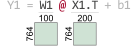

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 764 is different from 100)
Cause: @ on tensor operand W1 w/shape (764, 100) and operand X1.T w/shape (764, 200)

In [2]:
import tsensor
with tsensor.clarify():
    Y1 = W1 @ X1.T + b1